**This application is for choosing the healthie and more natural juice.**

# 1.Import Libraries




In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pd.set_option('display.max_columns', None)

# 2.Import Dataset


In [ ]:
products=pd.read_csv('/content/drive/MyDrive/P3/dataset/products.csv',sep="\t")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [ ]:
products.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [ ]:
products.describe(include="all")

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,3.207490e+05,320749,320770,3.207690e+05,320763,3.207720e+05,320772,303010,52795,104819,78960,78961,292360,292352,84410,84389,84411,22190,22153,36501,36495,46559,46644,46666,29306,29303,18803,23,20320,58193,51722,320492,320492,320492,248962,28344,19,24353,24329,24352,211331,0.0,248939.000000,248905,154680,154680,248939.000000,0.0,4835,248939.000000,0.0,11696,0.0,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,

Choose the beverages and then juice.

In [ ]:
products['pnns_groups_1'].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [ ]:
beverages = products.loc[products['pnns_groups_1']=="Beverages"]
beverages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9033 entries, 188 to 320763
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 11.2+ MB


In [ ]:
#words = ['Boissons','Boisson']
#beverages2 = products.loc[products['main_category_fr'].isin(words)]
#beverages2.info()

In [ ]:
beverages.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
188,10090206,http://world-fr.openfoodfacts.org/produit/0000...,sebleouf,1370977431,2013-06-11T19:03:51Z,1445083431,2015-10-17T12:03:51Z,Thé de Noël aromatisé orange-cannelle,NaN,75 g,aluminium,aluminium,Alice Délice,alice-delice,"Aliments et boissons à base de végétaux,Boisso...","en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso...",NaN,NaN,France,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lyon,France",Alice Délice,France,en:france,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,NaN,"Œufs,Gluten,Lait,Moutarde,Fruits à coque,Grain...","en:eggs,en:gluten,en:milk,en:mustard,en:nuts,e...","Œufs,Gluten,Lait,Moutarde,Fruits à coque,Grain...",NaN,NaN,0.0,[ the-noir-de-chine -> fr:the-noir-de-chine ...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Beverages,Non-sugared beverages,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:teas,Thés,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
beverages['pnns_groups_2'].unique()

array(['Non-sugared beverages', 'Sweetened beverages',
       'Artificially sweetened beverages', 'Fruit juices',
       'Fruit nectars'], dtype=object)

In [ ]:
#beverages['nutrition_grade_fr'].unique()

In [ ]:
#beverages[beverages['nutrition_grade_fr']=="a"]

In [ ]:
#juices = beverages[beverages['categories'].str.contains(('juice|jus'), na=False)]
#juices.info()

In [ ]:
juices = beverages[beverages['pnns_groups_2']=='Fruit juices']
juices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 10358 to 320668
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 2.4+ MB


In [ ]:
juices.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
10358,12000374012,http://world-fr.openfoodfacts.org/produit/0012...,tacinte,1421614897,2015-01-18T21:01:37Z,1439141785,2015-08-09T17:36:25Z,Strawberry Lemonade,Sparkling green coffee energy beverage,12 FL OZ (355 mL),can,can,"Starbucks,Starbucks Refreshers","starbucks,starbucks-refreshers","Lemonades,fruit juices","en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chicago,Illinois,USA",Jewel Osco,United States,en:united-states,États-Unis,NaN,NaN,NaN,NaN,NaN,NaN,1 can (12 FL OZ) 355 mL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b,Beverages,Fruit juices,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:sodas,Sodas,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,105.0,0.00,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7.50,5.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.00,NaN,NaN,NaN,0.00353,0.001390,NaN,0.000000,NaN,NaN,NaN,NaN,0.00333,NaN,NaN,0.00139,0.000139,NaN,NaN,NaN,NaN,0.000694,NaN,NaN,NaN,NaN,0.000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,-4.0,NaN,NaN
11226,

In [ ]:
juices.isnull().count()

code                       1924
url                        1924
creator                    1924
created_t                  1924
created_datetime           1924
                           ... 
carbon-footprint_100g      1924
nutrition-score-fr_100g    1924
nutrition-score-uk_100g    1924
glycemic-index_100g        1924
water-hardness_100g        1924
Length: 162, dtype: int64

In [ ]:
#juices['nutrition_grade_fr'].unique()

In [ ]:
#juices['labels'].unique()

In [ ]:
juices_bio = juices[juices['labels'].str.contains(('organic|bio'), na=False)]
juices_bio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 181258 to 310742
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 25.5+ KB


In [ ]:
#juices_bio.head()

In [ ]:
#juices_bio['nutrition_grade_fr'].unique()

# 3.Clean the Data

###3.1 Variable Selections

Keep useful columns (variables as shown in the picture).

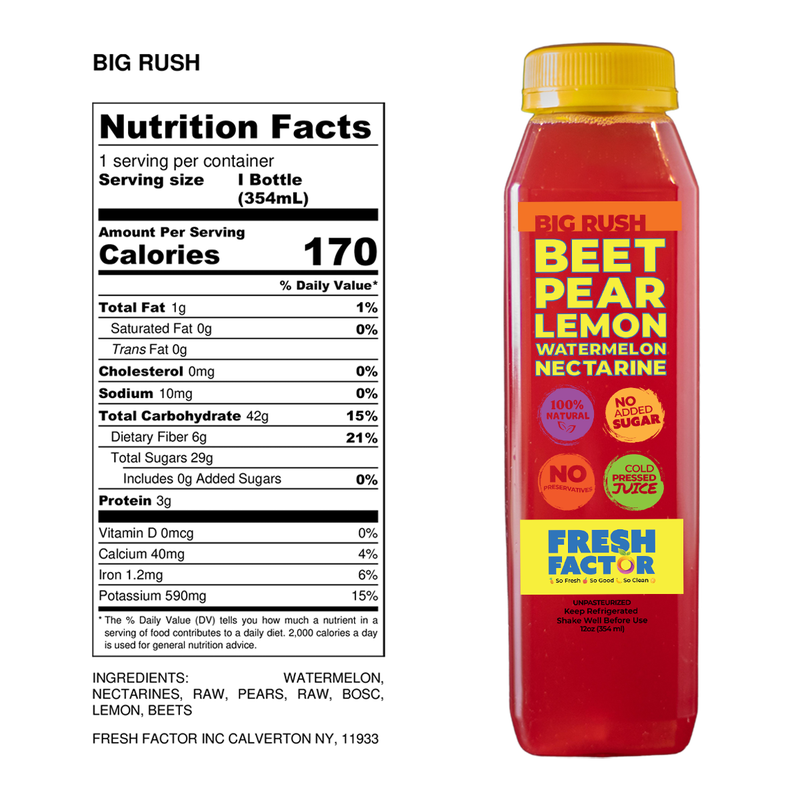

In [ ]:
cols = ['product_name','categories','labels','brands','quantity','origins','manufacturing_places','nutrition_grade_fr','nutrition-score-fr_100g','additives_n','energy_100g','fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g','sodium_100g','carbohydrates_100g','fiber_100g','sugars_100g','proteins_100g','vitamin-d_100g','vitamin-c_100g','calcium_100g','iron_100g','potassium_100g']

In [ ]:
juices = juices[cols]

In [ ]:
juices.describe(include="all")

,product_name,categories,labels,brands,quantity,origins,manufacturing_places,nutrition_grade_fr,nutrition-score-fr_100g,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,sodium_100g,carbohydrates_100g,fiber_100g,sugars_100g,proteins_100g,vitamin-d_100g,vitamin-c_100g,calcium_100g,iron_100g,potassium_100g
count,1904,1924,993,1882,1677,314,512,1592,1592.000000,1405.000000,1727.00000,1460.000000,1611.000000,15.0,15.0,1642.000000,1492.000000,1146.000000,1670.000000,1702.000000,2.000000,561.000000,25.000000,18.000000,18.000000
unique,1483,590,587,621,214,156,151,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jus d'orange,Jus d'orange 100% pur jus,"Bio,Bio européen,AB Agriculture Biologique",Tropicana,1 L,France,France,c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,38,126,85,151,446,40,117,1116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.065955,0.318861,200.12110,0.150086,0.047444,0.0,0.0,0.021767,10.838720,0.359137,10.159816,0.470446,0.000004,0.025594,0.037820,0.000513,0.164428
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.707867,0.735327,64.55854,0.235680,0.271291,0.0,0.0,0.495179,3.564865,0.411161,3.229272,0.524775,0.000000,0.015614,0.051734,0.000950,0.047986
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.000000,0.000000,14.00000,0.000000,0.000000,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.086000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,180.00000,0.000000,0.000000,0.0,0.0,0.000000,9.900000,0.000000,9.000000,0.200000,0.000004,0.020000,0.005880,0.000025,0.147000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,196.00000,0.100000,0.000000,0.0,0.0,0.003937,10.800000,0.300000,10.000000,0.500000,0.000004,0.024000,0.008890,0.000147,0.165000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,0.000000,210.00000,0.200000,0.040000,0.0,0.0,0.010000,11.700000,0.500000,11.000000,0.600000,0.000004,0.030000,0.042300,0.000507,0.186000


In [ ]:
juices.duplicated().sum()

0

In [ ]:
juices.nunique()

product_name               1483
categories                  590
labels                      587
brands                      621
quantity                    214
origins                     156
manufacturing_places        151
nutrition_grade_fr            4
nutrition-score-fr_100g      21
additives_n                   7
energy_100g                 229
fat_100g                     33
saturated-fat_100g           24
trans-fat_100g                1
cholesterol_100g              1
sodium_100g                 112
carbohydrates_100g          142
fiber_100g                   52
sugars_100g                 155
proteins_100g                48
vitamin-d_100g                1
vitamin-c_100g               72
calcium_100g                 18
iron_100g                    13
potassium_100g               16
dtype: int64

### 3.2 Outliers

From the table above:

1-min:

* **nutrition-score-fr_100g** has negative values but it seems normal after checking **nutrition-score-uk_100g** which contains negative values too.

nutrition-score-fr_100g : Nutri-Score - Nutrition score derived from the UK FSA score and adapted for the French market (formula defined by the team of Professor Hercberg).

nutrition-score-uk_100g : nutrition score defined by the UK Food Standards Administration (FSA).

2-max:


*   **energy_100g** did not specify the unit (cal or kj, 1 kj = 4.2 cal). A relatively healthy and natural juice usually has the energy smaller than 300 kj.
*   **carbohydrates_100g** and **sugars_100g** can be also high.

However, from the table below, it seems that high energy has a positive relationship with carbohydrates and sugars.



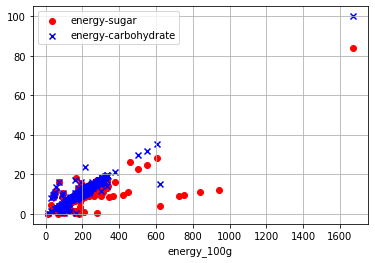

In [ ]:
plt.scatter(juices["energy_100g"],juices["sugars_100g"],c ='r',marker='o',label="energy-sugar")
plt.scatter(juices["energy_100g"],juices["carbohydrates_100g"],c ='b',marker="x",label="energy-carbohydrate")
#plt.xlim(0,1800)
plt.xticks(range(0,1800,200))
plt.grid()
plt.xlabel("energy_100g")
plt.legend()
plt.show()

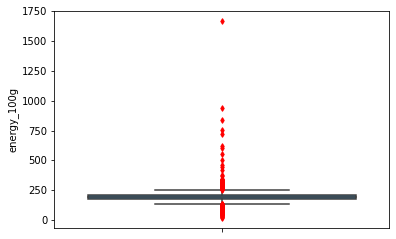

In [ ]:
sns.boxplot(data=juices,y=('energy_100g'), flierprops={'markerfacecolor':'red','markeredgecolor':'red','markersize':4})
plt.show()

Since there is a clear relationship between energy and carbohydrates and sugars, therefor for the outliers I will keep them here in order to have more variety.

In [ ]:
#juices_clean = juices[juices['energy_100g']<=400.0]
#plt.scatter(juices_clean["energy_100g"],juices_clean["sugars_100g"],c ='r',marker='o',label="energy-sugar")
#plt.scatter(juices_clean["energy_100g"],juices_clean["carbohydrates_100g"],c ='b',marker="x",label="energy-carbohydrate")
#plt.legend(loc='upper right')
#plt.xlabel("energy_100g")

In [ ]:
#juices_clean.describe(include="all")

####additives_n: number of food additives

In [ ]:
#juices_clean['additives_n'].quantile([0.25,0.5,0.75])

In [ ]:
#add_Q1 = juices_clean['additives_n'].quantile(q = 0.25)
#add_Q3 = juices_clean['additives_n'].quantile(q = 0.75)

#add_low_whisker = add_Q1 - 1.5*(add_Q3 - add_Q1)
#add_up_whisker = add_Q3 + 1.5*(add_Q3 - add_Q1)

#print(add_low_whisker,add_up_whisker)

In [ ]:
#juices_clean[(juices_clean['additives_n'] > add_up_whisker) | (juices_clean['additives_n'] < add_low_whisker)]

In [ ]:
#f,ax=plt.subplots(figsize=(10,8))
#sns.boxplot(data=juices_clean,y=('additives_n'))
#plt.show()

In [ ]:
#juices_clean.plot.scatter(x='energy_100g', y='additives_n')

additives_n seems good, no need to change anything.

####energy_100g

In [ ]:
#juices_clean['energy_100g'].quantile([0.25,0.5,0.75])

In [ ]:
#ene_low_whisker = juices_clean['energy_100g'].quantile(q = 0.25) - 1.5*(juices_clean['energy_100g'].quantile(q = 0.75) - juices_clean['energy_100g'].quantile(q = 0.25))
#ene_up_whisker = juices_clean['energy_100g'].quantile(q = 0.75) + 1.5*(juices_clean['energy_100g'].quantile(q = 0.75) - juices_clean['energy_100g'].quantile(q = 0.25))

#print(ene_low_whisker,ene_up_whisker)

In [ ]:
##sns.boxplot(data=juices_clean,y=('energy_100g'), flierprops={'markerfacecolor':'red','markeredgecolor':'red','markersize':4})
#plt.show()

In [ ]:
#juices_clean['energy_100g'][juices_clean['energy_100g'] >= ene_up_whisker] = np.NaN

####Batch Processing

In [ ]:
col_num = ['nutrition-score-fr_100g','energy_100g','fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g','sodium_100g','carbohydrates_100g','fiber_100g','sugars_100g','proteins_100g','vitamin-d_100g','vitamin-c_100g','calcium_100g','iron_100g','potassium_100g']

In [ ]:
#for col in col_num:
#  Q1 = juices_clean[col].quantile(q = 0.25)
#  Q3 = juices_clean[col].quantile(q = 0.75)
#  low = Q1 - 1.5*(Q3 - Q1)
#  upper = Q3 + 1.5*(Q3 - Q1)
#  print(col," upper=",upper)
#  juices_clean[col][juices_clean[col] >= upper] = np.NaN

In [ ]:
#juices_clean.describe(include="all")

### 3.3 Delete Large-number-missing Variables

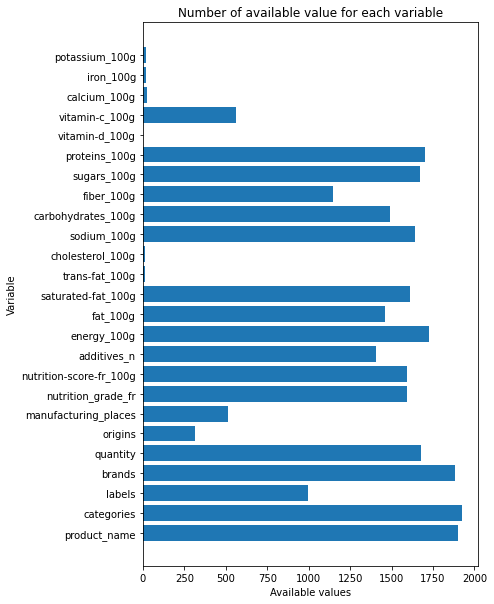

In [ ]:
plt.figure(figsize = (6,10))
x = juices.columns
y = len(juices) - juices.isna().sum()
plt.barh(x,y)
plt.title("Number of available value for each variable")
plt.xlabel("Available values")
plt.ylabel("Variable")
plt.show()

In [ ]:
missing_row = juices.isnull().sum().sort_values(ascending=False)
missing_row_per = ((juices.isnull().sum()/juices.isnull().count()).sort_values(ascending=False))*100
missing = pd.concat([missing_row, missing_row_per], axis=1, keys=['Total missing', 'Percentage in the dataset'])
missing

,Total missing,Percentage in the dataset
vitamin-d_100g,1922,99.896050
trans-fat_100g,1909,99.220374
cholesterol_100g,1909,99.220374
potassium_100g,1906,99.064449
iron_100g,1906,99.064449
calcium_100g,1899,98.700624
origins,1610,83.679834
manufacturing_places,1412,73.388773
vitamin-c_100g,1363,70.841996
labels,931,48.388773


Delete the numeric variables whose missing ratio is greater than 60%.

In [ ]:
juices_clean = juices.drop(columns=['vitamin-d_100g','trans-fat_100g','cholesterol_100g','iron_100g','potassium_100g','calcium_100g','vitamin-c_100g'])

In [ ]:
missing_row = juices_clean.isnull().sum().sort_values(ascending=False)
missing_row_per = ((juices_clean.isnull().sum()/juices_clean.isnull().count()).sort_values(ascending=False))*100
missing = pd.concat([missing_row, missing_row_per], axis=1, keys=['Total missing', 'Percentage in the dataset'])
missing

,Total missing,Percentage in the dataset
origins,1610,83.679834
manufacturing_places,1412,73.388773
labels,931,48.388773
fiber_100g,778,40.436590
additives_n,519,26.975052
fat_100g,464,24.116424
carbohydrates_100g,432,22.453222
nutrition_grade_fr,332,17.255717
nutrition-score-fr_100g,332,17.255717
saturated-fat_100g,313,16.268191


In [ ]:
#code from OC course
#almost the same function as the above codes
juices_clean.isna().mean()*100

product_name                1.039501
categories                  0.000000
labels                     48.388773
brands                      2.182952
quantity                   12.837838
origins                    83.679834
manufacturing_places       73.388773
nutrition_grade_fr         17.255717
nutrition-score-fr_100g    17.255717
additives_n                26.975052
energy_100g                10.239085
fat_100g                   24.116424
saturated-fat_100g         16.268191
sodium_100g                14.656965
carbohydrates_100g         22.453222
fiber_100g                 40.436590
sugars_100g                13.201663
proteins_100g              11.538462
dtype: float64

In [ ]:
juices_clean.describe(include="all")

,product_name,categories,labels,brands,quantity,origins,manufacturing_places,nutrition_grade_fr,nutrition-score-fr_100g,additives_n,energy_100g,fat_100g,saturated-fat_100g,sodium_100g,carbohydrates_100g,fiber_100g,sugars_100g,proteins_100g
count,1904,1924,993,1882,1677,314,512,1592,1592.000000,1405.000000,1727.00000,1460.000000,1611.000000,1642.000000,1492.000000,1146.000000,1670.000000,1702.000000
unique,1483,590,587,621,214,156,151,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jus d'orange,Jus d'orange 100% pur jus,"Bio,Bio européen,AB Agriculture Biologique",Tropicana,1 L,France,France,c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,38,126,85,151,446,40,117,1116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.065955,0.318861,200.12110,0.150086,0.047444,0.021767,10.838720,0.359137,10.159816,0.470446
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.707867,0.735327,64.55854,0.235680,0.271291,0.495179,3.564865,0.411161,3.229272,0.524775
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.000000,0.000000,14.00000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,180.00000,0.000000,0.000000,0.000000,9.900000,0.000000,9.000000,0.200000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,196.00000,0.100000,0.000000,0.003937,10.800000,0.300000,10.000000,0.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,0.000000,210.00000,0.200000,0.040000,0.010000,11.700000,0.500000,11.000000,0.600000


### 3.4 Deal with Missing Values

In [ ]:
col_num_na = ['nutrition-score-fr_100g','additives_n','energy_100g','fat_100g','saturated-fat_100g','sodium_100g','carbohydrates_100g','fiber_100g','sugars_100g','proteins_100g']

In [ ]:
#col_num_na.index("additives_n")

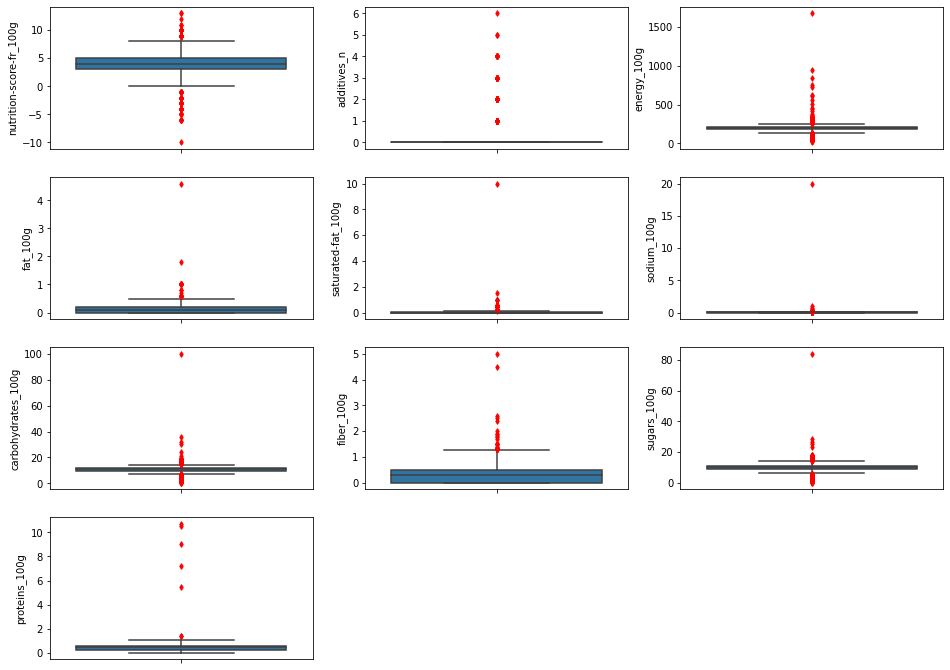

In [ ]:
plt.figure(figsize=(16,12))
for i in range (10):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(data=juices_clean,y=col_num_na[i], flierprops={'markerfacecolor':'red','markeredgecolor':'red','markersize':4})
  plt.ylabel(col_num_na[i])
plt.show()

####Replace by mean or median

As there are outliers, therefore, here I use median to replace the missing values.

In [ ]:
juices_clean_median = juices_clean.copy(deep=True)

In [ ]:
for col in col_num_na:
   juices_clean_median[col].fillna(juices_clean_median[col].median(),inplace=True)

In [ ]:
juices_clean_median.isna().mean()*100

product_name                1.039501
categories                  0.000000
labels                     48.388773
brands                      2.182952
quantity                   12.837838
origins                    83.679834
manufacturing_places       73.388773
nutrition_grade_fr         17.255717
nutrition-score-fr_100g     0.000000
additives_n                 0.000000
energy_100g                 0.000000
fat_100g                    0.000000
saturated-fat_100g          0.000000
sodium_100g                 0.000000
carbohydrates_100g          0.000000
fiber_100g                  0.000000
sugars_100g                 0.000000
proteins_100g               0.000000
dtype: float64

In [ ]:
juices_clean_median.describe(include="all")

,product_name,categories,labels,brands,quantity,origins,manufacturing_places,nutrition_grade_fr,nutrition-score-fr_100g,additives_n,energy_100g,fat_100g,saturated-fat_100g,sodium_100g,carbohydrates_100g,fiber_100g,sugars_100g,proteins_100g
count,1904,1924,993,1882,1677,314,512,1592,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000
unique,1483,590,587,621,214,156,151,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jus d'orange,Jus d'orange 100% pur jus,"Bio,Bio européen,AB Agriculture Biologique",Tropicana,1 L,France,France,c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,38,126,85,151,446,40,117,1116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054574,0.232848,199.699137,0.138007,0.039726,0.019154,10.830026,0.335224,10.138718,0.473856
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.463173,0.644059,61.175156,0.206402,0.248850,0.457476,3.139048,0.318592,3.008939,0.493646
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,182.000000,0.000000,0.000000,0.000000,10.000000,0.200000,9.300000,0.300000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,196.000000,0.100000,0.000000,0.003937,10.800000,0.300000,10.000000,0.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,0.000000,209.000000,0.100000,0.010000,0.007874,11.300000,0.400000,11.000000,0.600000


####Heatmap

In [ ]:
juices_heatmap = juices_clean[col_num_na]

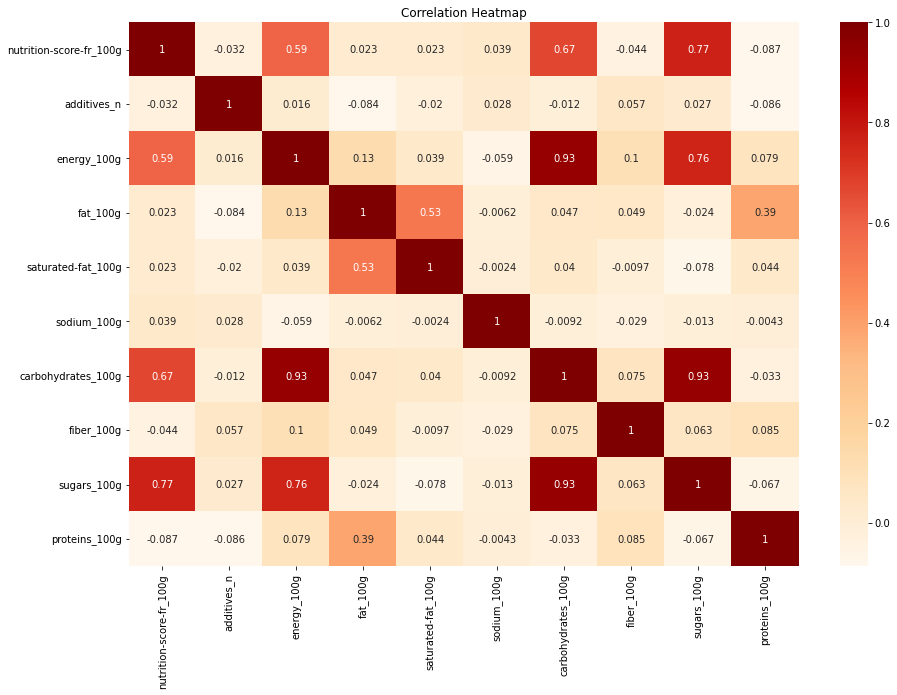

In [ ]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = juices_heatmap.corr()
sns.heatmap(corr,cmap="OrRd",annot=True)
plt.show()

I consider that there is a good relation between two variables with a correlation coefficient greater than 0.6 (or smaller than -0.6).

Therefore, the following two variables are in a good relation:

* **nutrition-score-fr** with **sugars**, **carbohydrates**.

* **energy** with **carbohydrates**, **sugars**

* **carbohydrates** with **sugars**


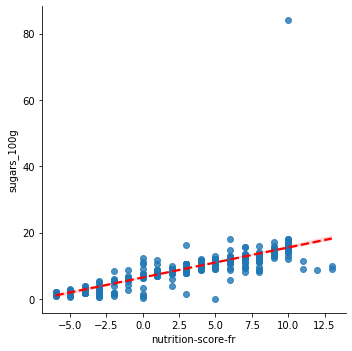

In [ ]:
sns.lmplot(data = juices_heatmap, x = 'nutrition-score-fr_100g', y = 'sugars_100g', line_kws={'linestyle':'--','color':'r'})
plt.xlabel('nutrition-score-fr')
plt.ylabel('sugars_100g')
plt.show()

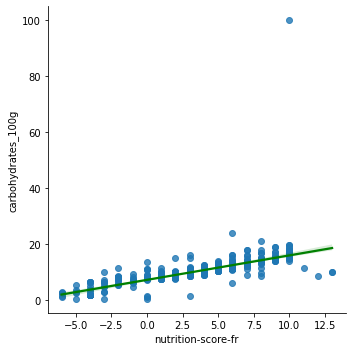

In [ ]:
sns.lmplot(data = juices_heatmap, x = 'nutrition-score-fr_100g', y = 'carbohydrates_100g', line_kws={'linestyle':'-','color':'g'})
plt.xlabel('nutrition-score-fr')
plt.ylabel('carbohydrates_100g')

plt.show()

####IterativeImputer

From the heatmap, we can see that **nutrition-score-fr_100g** has a strong relationship with **sugars_100g** and **carbohydrates_100g**. Therefore, here we will apply IterativeImputation to predicting these variables.

In [ ]:
col_ii =['nutrition-score-fr_100g','sugars_100g','carbohydrates_100g']

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
juices_clean_ii = juices_clean.copy(deep=True)

In [ ]:
imputer = IterativeImputer(n_nearest_features=None, initial_strategy="median",imputation_order='ascending',min_value=0.0)
#juices_clean_numeric = juices_clean_ii[col_num_na]
juices_clean_numeric = juices_clean_ii[col_ii]
juices_clean_imputer = imputer.fit_transform(juices_clean_numeric)

In [ ]:
juices_clean_imputer

array([[-2.        ,  5.56      ,  7.5       ],
       [ 5.35629701, 11.8       , 11.8       ],
       [ 0.        ,  6.29      ,  8.29      ],
       ...,
       [ 5.44547531, 12.3524678 , 13.4       ],
       [ 4.035891  , 10.08999798, 10.80558366],
       [ 4.        ,  9.2       , 10.2       ]])

In [ ]:
for col in col_ii:
   juices_clean_ii[col] = juices_clean_imputer[:,col_ii.index(col)]

juices_clean_ii.describe(include="all")

,product_name,categories,labels,brands,quantity,origins,manufacturing_places,nutrition_grade_fr,nutrition-score-fr_100g,additives_n,energy_100g,fat_100g,saturated-fat_100g,sodium_100g,carbohydrates_100g,fiber_100g,sugars_100g,proteins_100g
count,1904,1924,993,1882,1677,314,512,1592,1924.000000,1405.000000,1727.00000,1460.000000,1611.000000,1642.000000,1924.000000,1146.000000,1924.000000,1702.000000
unique,1483,590,587,621,214,156,151,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jus d'orange,Jus d'orange 100% pur jus,"Bio,Bio européen,AB Agriculture Biologique",Tropicana,1 L,France,France,c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,38,126,85,151,446,40,117,1116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.067605,0.318861,200.12110,0.150086,0.047444,0.021767,10.841561,0.359137,10.125955,0.470446
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.535982,0.735327,64.55854,0.235680,0.271291,0.495179,3.317900,0.411161,3.063182,0.524775
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.000000,0.000000,14.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,180.00000,0.000000,0.000000,0.000000,10.000000,0.000000,9.300000,0.200000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,196.00000,0.100000,0.000000,0.003937,10.805584,0.300000,10.089998,0.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,0.000000,210.00000,0.200000,0.040000,0.010000,11.600000,0.500000,11.000000,0.600000


####KNN



I will use KNN to predict the "**nutrition-score-fr_100g**" which is a quantitative variable.




In [ ]:
juices_clean_knn = juices_clean_median.copy(deep=True)

In [ ]:
juices_clean_knn.drop(columns=['nutrition-score-fr_100g'],inplace=True)

In [ ]:
juices_clean_knn['nutrition-score-fr_100g'] = juices_clean['nutrition-score-fr_100g']

In [ ]:
juices_clean_knn.head()

,product_name,categories,labels,brands,quantity,origins,manufacturing_places,nutrition_grade_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,sodium_100g,carbohydrates_100g,fiber_100g,sugars_100g,proteins_100g,nutrition-score-fr_100g
10358,Strawberry Lemonade,"Lemonades,fruit juices",NaN,"Starbucks,Starbucks Refreshers",12 FL OZ (355 mL),NaN,NaN,b,0.0,105.0,0.000,0.0,0.001390,7.50,0.000,5.56,0.00,-2.0
11226,mango protein flavored soy protein shake,"Beverages,Plant-based beverages,Fruit-based be...",NaN,odwalla,15.2 fl oz (450 ml),NaN,NaN,NaN,3.0,303.0,0.219,0.0,0.085500,11.80,0.877,11.80,5.48,NaN
13129,Coconut Juice,"Jus de fruits,Jus de coco",NaN,"Foco,Thai Agri Foods Co. Ltd.",350 mL,NaN,NaN,b,0.0,142.0,0.290,0.0,0.037000,8.29,0.300,6.29,0.00,0.0
13134,coconut juice,"Jus de fruits,Jus de coco",NaN,"foco,Thai Agri Foods Co. Ltd.",520 ml,NaN,NaN,b,0.0,140.0,0.208,0.0,0.037500,8.33,0.000,6.25,0.00,0.0
13135,Roasted Coconut Juice,"Jus de fruits,Jus de coco",NaN,"Foco,Thai Agri Foods Co. Ltd.",350 mL,NaN,NaN,c,0.0,172.0,0.500,0.1,0.047244,9.20,0.000,8.90,0.50,2.0


#####Lable Encoding

In [ ]:
#juices_clean_knn['nutrition_grade_fr'].unique()

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#df_lable = LabelEncoder()
#juices_clean_knn['nutrition_grade_fr'] = df_lable.fit_transform(juices_clean_knn['nutrition_grade_fr'])
#juices_clean_knn['nutrition_grade_fr'].unique()

The numerical values now in the column "nutrition_grade_fr" represent:

0='b'

4=nan

1='c'

2='d'

3='e'.



In [ ]:
#juices_clean_knn["nutrition_grade_fr"].hist()
#plt.xlabel("Nutrition grade (0=b,1=c,2=d,3=e,4=nan)")
#plt.xticks(range(0,5,1))
#plt.ylabel("Number of each grade")
#plt.show()

In [ ]:
#juices_clean_knn.head()

In [ ]:
#correlation_matrix = juices_clean_knn.corr()
#correlation_matrix["nutrition_grade_fr"]

#####Set up the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_train = juices_clean_knn[(juices_clean_knn['nutrition-score-fr_100g'].notnull())] #Keep the columns that have a nutrient grade
X_train = X_train[col_num_na] #Keep numerical values
X_train = X_train.drop(columns=['nutrition-score-fr_100g'])
X_train

,additives_n,energy_100g,fat_100g,saturated-fat_100g,sodium_100g,carbohydrates_100g,fiber_100g,sugars_100g,proteins_100g
10358,0.0,105.0,0.000,0.0,0.001390,7.50,0.0,5.56,0.0
13129,0.0,142.0,0.290,0.0,0.037000,8.29,0.3,6.29,0.0
13134,0.0,140.0,0.208,0.0,0.037500,8.33,0.0,6.25,0.0
13135,0.0,172.0,0.500,0.1,0.047244,9.20,0.0,8.90,0.5
17839,1.0,196.0,0.100,0.0,0.003937,10.80,0.3,10.00,0.5
...,...,...,...,...,...,...,...,...,...
319829,0.0,215.0,0.100,0.0,0.001000,10.80,0.0,8.60,0.7
319858,0.0,197.0,0.300,0.1,0.005000,9.60,0.3,9.60,0.6
319896,0.0,233.0,0.000,0.0,0.010000,13.40,0.2,11.60,0.4
320095,0.0,180.0,1.000,1.0,0.005000,10.00,1.0,8.40,1.0


In [ ]:
X_pred = juices_clean_knn[(juices_clean_knn['nutrition_grade_fr'].isnull())] #Keep the columns that does NOT have a nutrient grade
X_pred = X_pred[col_num_na]
X_pred = X_pred.drop(columns=['nutrition-score-fr_100g'])
X_pred

,additives_n,energy_100g,fat_100g,saturated-fat_100g,sodium_100g,carbohydrates_100g,fiber_100g,sugars_100g,proteins_100g
11226,3.0,303.0,0.219,0.0,0.085500,11.8,0.877,11.8,5.480
17838,0.0,174.0,0.000,0.0,0.014600,10.4,0.300,10.0,0.000
21710,1.0,204.0,0.000,0.0,0.006670,11.3,0.300,10.0,0.667
23499,2.0,201.0,0.000,0.0,0.008000,12.0,0.300,11.2,0.000
23675,0.0,196.0,0.100,0.0,0.003937,10.8,0.300,10.0,0.500
...,...,...,...,...,...,...,...,...,...
319863,0.0,196.0,0.100,0.0,0.003937,10.8,0.300,10.0,0.500
320017,0.0,196.0,0.100,0.0,0.003937,10.8,0.300,10.0,0.500
320508,2.0,246.0,0.100,0.0,0.003937,14.0,0.300,10.0,0.100
320509,1.0,234.0,0.100,0.0,0.003937,13.4,0.300,10.0,0.140


In [ ]:
col_num_na

['nutrition-score-fr_100g',
 'additives_n',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'sodium_100g',
 'carbohydrates_100g',
 'fiber_100g',
 'sugars_100g',
 'proteins_100g']

In [ ]:
Y_train = juices_clean_knn[(juices_clean_knn['nutrition-score-fr_100g'].notnull())]
Y_train = Y_train["nutrition-score-fr_100g"]
Y_train

10358     -2.0
13129      0.0
13134      0.0
13135      2.0
17839    -10.0
          ... 
319829     4.0
319858     4.0
319896     6.0
320095     1.0
320668     4.0
Name: nutrition-score-fr_100g, Length: 1592, dtype: float64

In [ ]:
Y_pred = juices_clean_knn[(juices_clean_knn['nutrition-score-fr_100g'].isnull())]
Y_pred = Y_pred["nutrition-score-fr_100g"]
Y_pred

11226    NaN
17838    NaN
21710    NaN
23499    NaN
23675    NaN
          ..
319863   NaN
320017   NaN
320508   NaN
320509   NaN
320666   NaN
Name: nutrition-score-fr_100g, Length: 332, dtype: float64

In [ ]:
# Normalize the dataset
#from sklearn import preprocessing
#X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
#X_train.shape

#####Train the model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.8)

Look for the best K

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1,50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)
k = gridsearch.best_params_.get('n_neighbors')
print(k)

9


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_train_pred = knn_model.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)

y_test_pred = knn_model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)

print("rmse_train=",rmse_train,"rmse_test=",rmse_test)

rmse_train= 1.0252644371666872 rmse_test= 0.9584825526561634


#####Predict the nutrient grades

In [ ]:
#Y_pred = Y_pred.replace(4,np.nan)
#Y_pred

In [ ]:
Y_pred = knn_model.predict(X_pred)
Y_pred

array([ 8.33333333,  2.66666667,  4.        ,  4.44444444,  4.        ,
        4.55555556,  4.66666667,  4.        ,  4.        ,  4.        ,
        2.44444444,  4.        ,  4.        ,  5.        ,  4.        ,
        4.        ,  3.88888889,  5.77777778,  4.        , -4.        ,
        4.33333333,  4.        ,  4.        ,  1.55555556,  4.        ,
        3.88888889,  7.44444444,  4.33333333,  4.        ,  4.        ,
        4.        ,  4.        ,  4.        ,  4.        ,  2.44444444,
        4.        ,  4.        ,  4.        ,  4.        ,  4.        ,
        8.22222222,  3.66666667,  2.33333333,  4.        ,  4.        ,
        2.44444444,  4.        ,  5.        ,  4.        ,  4.        ,
        4.        ,  3.22222222,  2.44444444,  3.77777778,  3.        ,
       -2.11111111, -0.33333333,  4.66666667,  2.22222222,  4.55555556,
        3.88888889,  4.        ,  4.        ,  4.        ,  4.        ,
        4.        ,  4.        ,  2.44444444,  4.        ,  4.11

In [ ]:
#Y_pred =Y_pred.round(0)
#Y_pred

In [ ]:
#Y_pred_cat = [str(x) for x in Y_pred]

In [ ]:
#for i in range(len(Y_pred_cat)):
#  if Y_pred_cat[i]=='0.0':
#    Y_pred_cat[i] = Y_pred_cat[i].replace('0.0', "b")
#  if Y_pred_cat[i]=='1.0':
#    Y_pred_cat[i] = Y_pred_cat[i].replace('1.0', "c")
#  if Y_pred_cat[i]=='2.0':
#    Y_pred_cat[i] = Y_pred_cat[i].replace('2.0', "d")
#  if Y_pred_cat[i]=='3.0':
#    Y_pred_cat[i] = Y_pred_cat[i].replace('3.0', "e")
#Y_pred_cat

# 4.Data Exploration and Analysis

## 4.1 Univariate Analysis

###Histogram

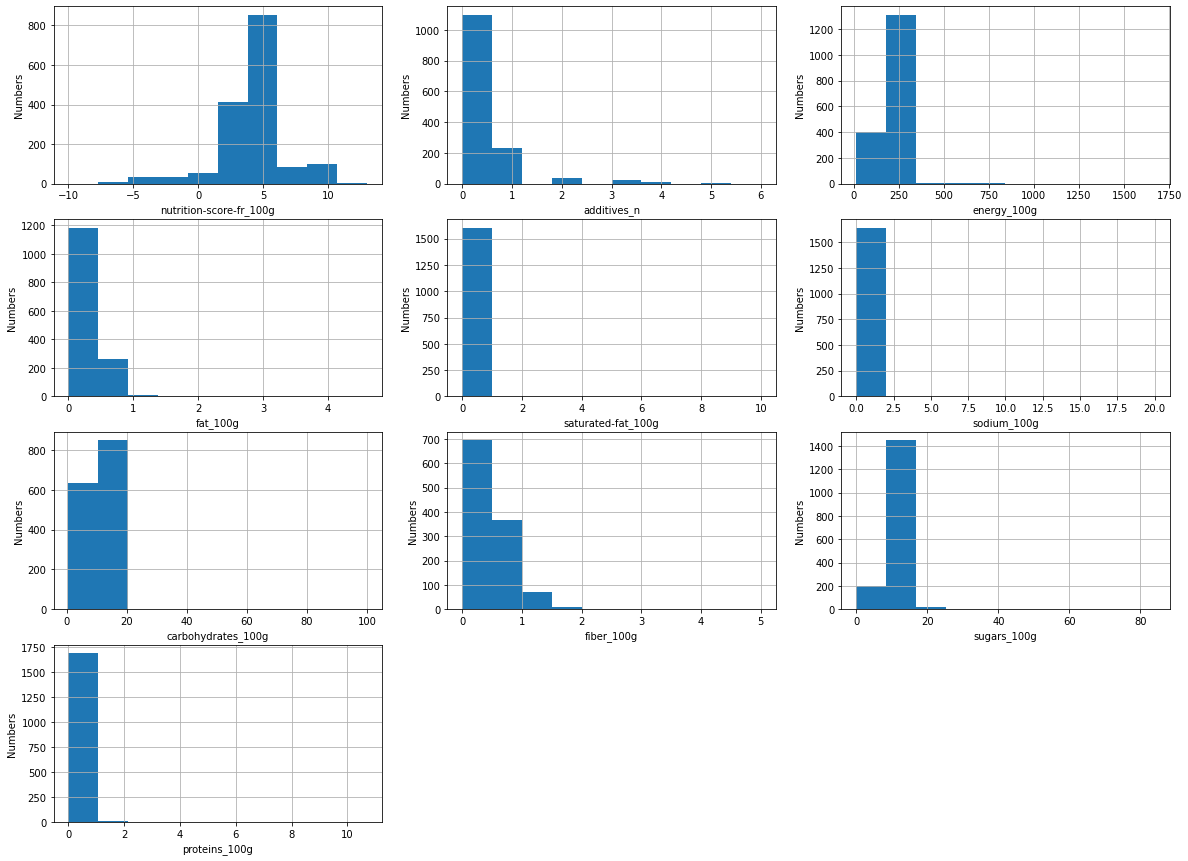

In [ ]:
plt.figure(figsize=(20,15))
for i in range (10):
  plt.subplot(4, 3, i + 1)
  ax = juices_clean[col_num_na[i]].hist()
  plt.xlabel(col_num_na[i])
  plt.ylabel("Numbers")
plt.show()

###Density

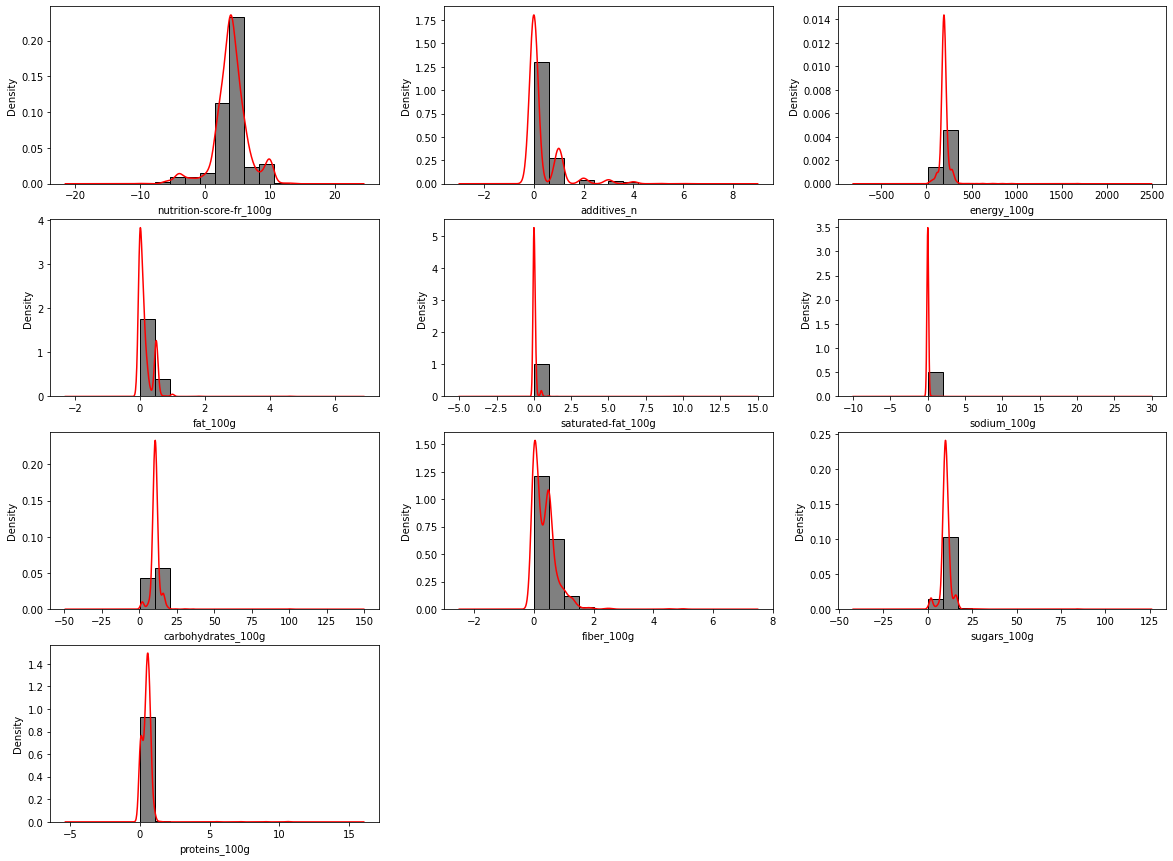

In [ ]:
plt.figure(figsize=(20,15))
for i in range (10):
  plt.subplot(4, 3, i + 1)
  ax = juices_clean[col_num_na[i]].plot(kind = 'hist', color = 'gray', edgecolor = 'black', density = True)
  juices_clean[col_num_na[i]].plot(kind = 'kde', color = 'red', label = 'density')
  plt.xlabel(col_num_na[i])
  plt.ylabel("Density")
plt.show()

**unimodal:** energy_100g, saturated-fat_100g, sodium_100g, poteins_100g, carbohydrates_100g.

**bimodal:** additives_n, fat_100g, fiber_100g, sugars_100g.

**multimondal:** nutrition-score-fr_100g.

###Boxplot


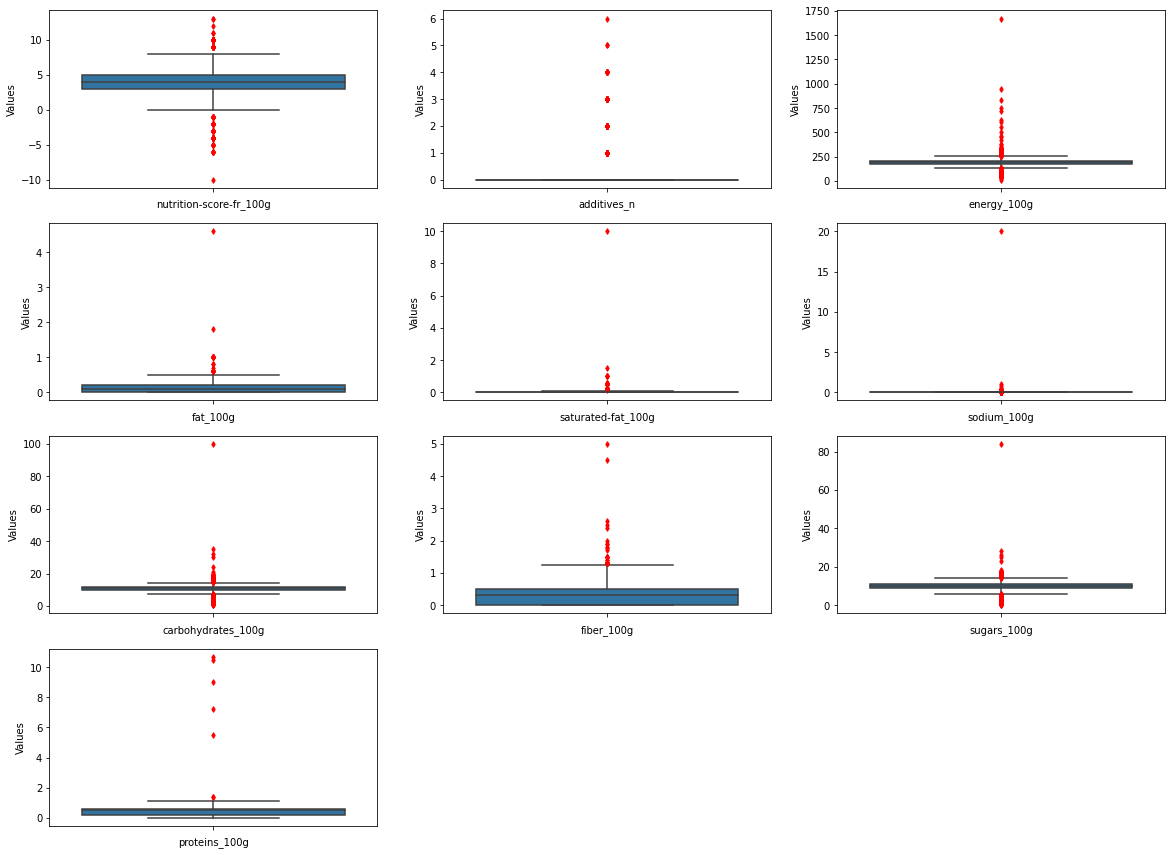

In [ ]:
plt.figure(figsize=(20,15))
for i in range (10):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(data=juices_clean,y=col_num_na[i], flierprops={'markerfacecolor':'red','markeredgecolor':'red','markersize':4})
  plt.xlabel(col_num_na[i])
  plt.ylabel("Values")
plt.show()

###Violinplot

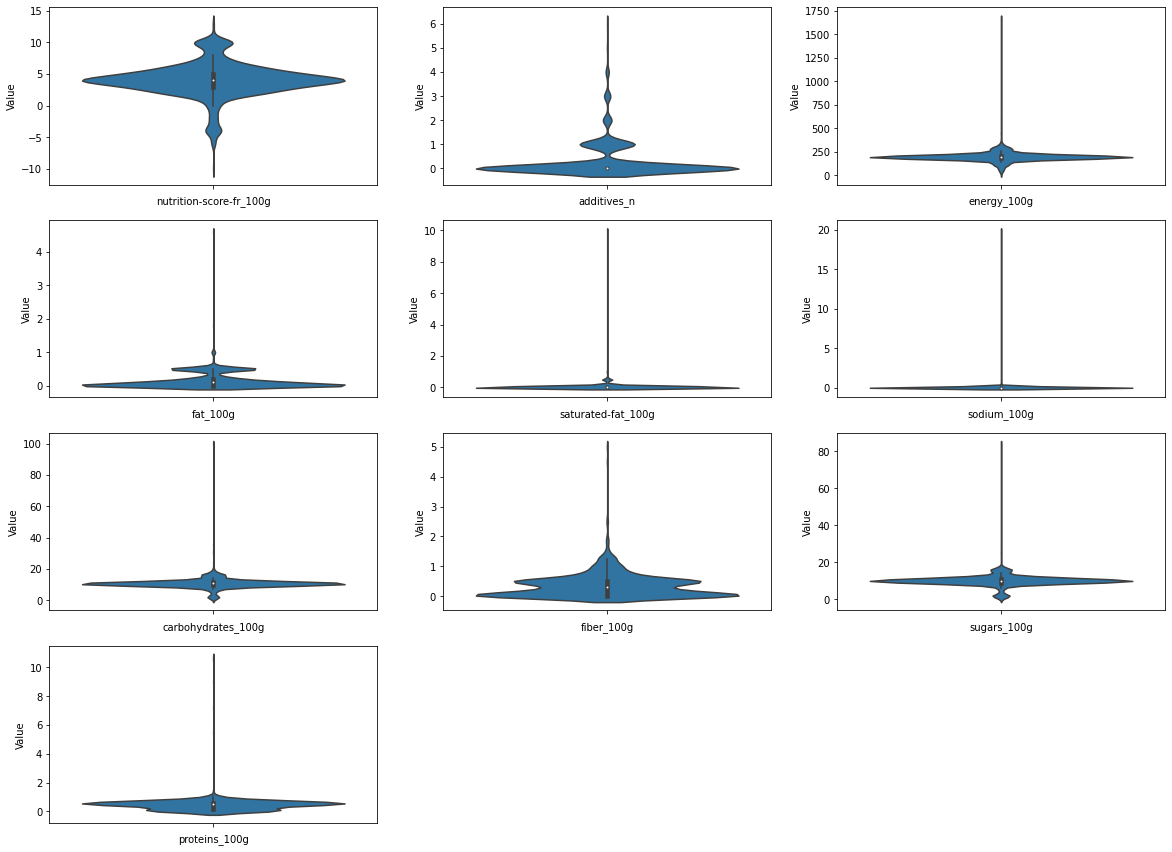

In [ ]:
plt.figure(figsize=(20,15))
for i in range (10):
  plt.subplot(4, 3, i + 1)
  ax = sns.violinplot(y=col_num_na[i],data=juices_clean)
  plt.xlabel(col_num_na[i])
  plt.ylabel("Value")
plt.show()

###Pie

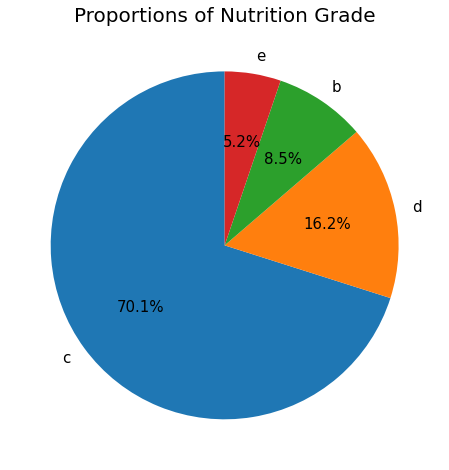

In [ ]:
plt.figure(figsize=(10,8))
patches, l_text, p_text = plt.pie(x=juices_clean['nutrition_grade_fr'].value_counts(),labels=juices_clean['nutrition_grade_fr'].value_counts().index,autopct='%1.1f%%', startangle = 90, textprops={'fontsize': 15})
plt.title("Proportions of Nutrition Grade", fontsize = 20)

#text inside the pie
#for t in p_text:
#    t.set_size(15)
#text next to the pie
#for t in l_text:
#    t.set_size(20)

plt.show()

## 4.2 Bivariate

###Heatmap

In [ ]:
juices_heatmap2 = juices_clean_median[col_num_na]

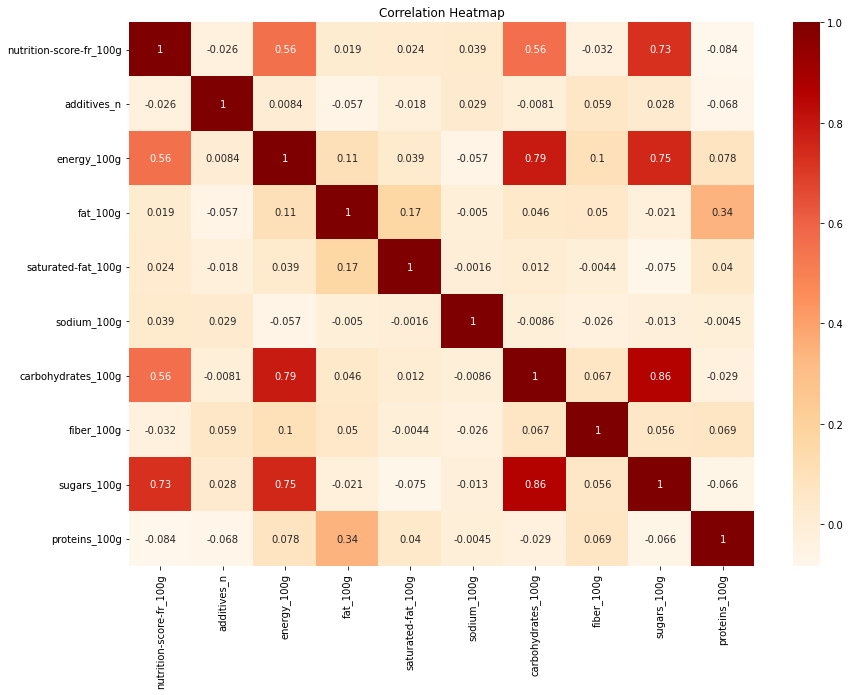

In [ ]:
plt.figure(figsize=(14,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = juices_heatmap2.corr()
sns.heatmap(corr,cmap="OrRd",annot=True)
plt.show()

###Scatter

In [ ]:
col_corr = ['energy_100g','carbohydrates_100g','sugars_100g','nutrition-score-fr_100g']

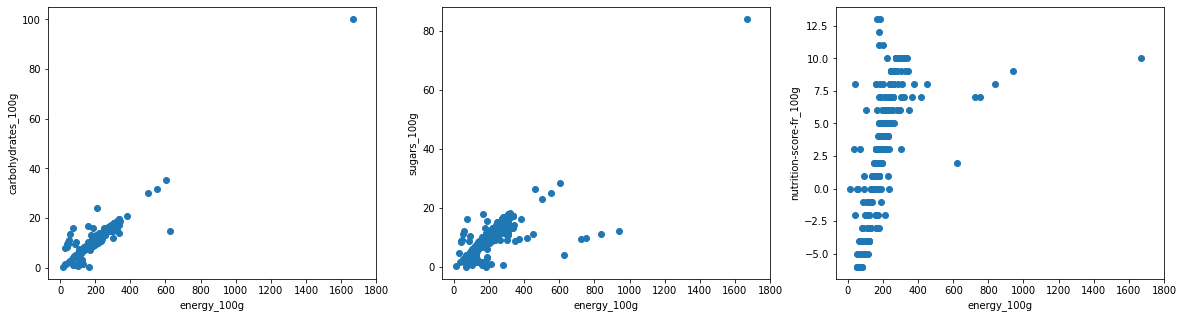

In [ ]:
plt.figure(figsize=(20,5))
for i in range (3):
  plt.subplot(1, 3, i + 1)
  plt.scatter(juices_clean['energy_100g'],juices_clean[col_corr[i+1]])
  plt.xlabel('energy_100g')
  plt.xticks(range(0,2000,200))
  plt.ylabel(col_corr[i+1])

  #regress line
  #linear_model=np.polyfit(juices_clean['energy_100g'],juices_clean[col_corr[i+1]],1)
  #linear_model_fn=np.poly1d(linear_model)
  #x_s=np.arange(0,2000)
  #plt.plot(x_s,linear_model_fn(x_s),color="red")

plt.show()

###Boxplot

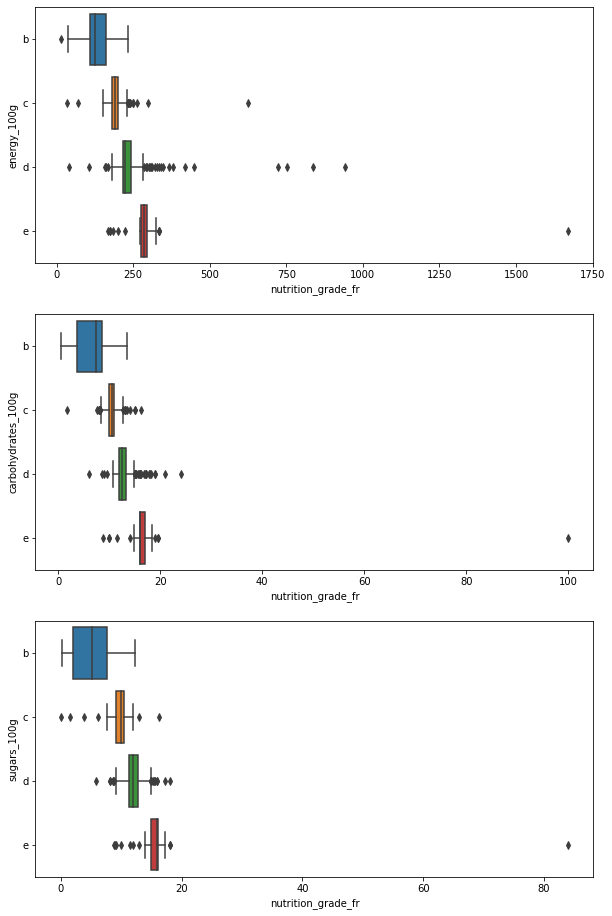

In [ ]:
plt.figure(figsize=(10,16))

for i in range (3):
  plt.subplot(3, 1, i + 1)
  sns.boxplot(data=juices_clean, y="nutrition_grade_fr", x=col_corr[i])
  plt.xlabel('nutrition_grade_fr')
  plt.ylabel(col_corr[i])

plt.show()

###Bar

In [ ]:
x=juices_clean.groupby(['nutrition_grade_fr']).mean()

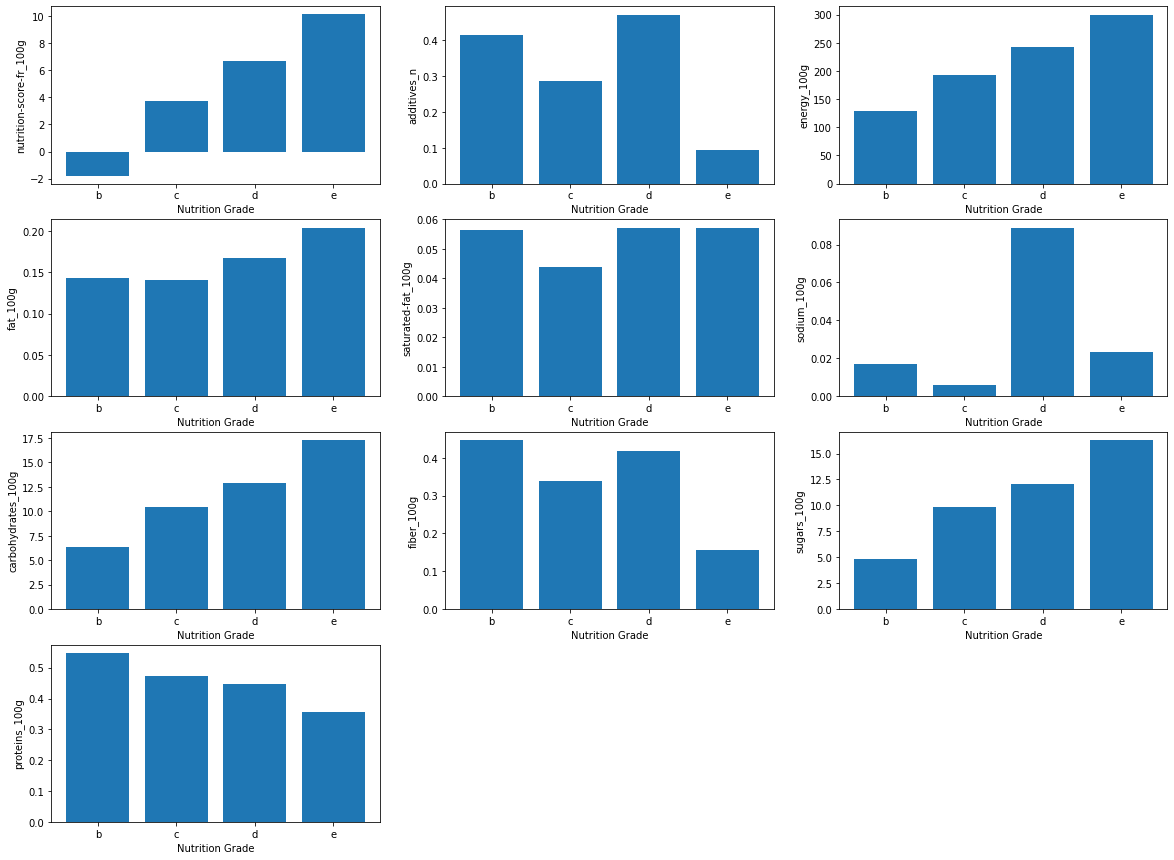

In [ ]:
plt.figure(figsize=(20,15))
for i in range (10):
  plt.subplot(4, 3, i + 1)
  plt.bar(data=x,x=['b','c','d','e'],height=x[col_num_na[i]])
  plt.xlabel('Nutrition Grade')
  plt.ylabel(col_num_na[i])
plt.show()

## 4.3 Multivariate

### ANOVA

####Linear Correlation Coeffifient Test

In [ ]:
##Here I use Pearson Correlation Coefficient.
def test_correlation(variable1, variable2, method='pearson'):
    if method == 'pearson':
      stat, p = stats.pearsonr(variable1,variable2)

      print(f"Pearson linear correlation statistical test between {variable1.name} and {variable2.name}\n")
      print(f"Linear correlation coefficient= {stat}, p-valeur= {p}\n")

      if p > 0.05:
        print("p-value > 5%, H0: Variables are independent.")
      if p < 0.05:
        print("p-value < 5%, H1: Variables are not independent." )

      #return stat, p

In [ ]:
test_correlation(juices_clean_median["nutrition-score-fr_100g"],juices_clean_median["sugars_100g"])

Pearson linear correlation statistical test between nutrition-score-fr_100g and sugars_100g

Linear correlation coefficient= 0.7270540881295463, p-valeur= 3.30257964e-316

p-value < 5%, H1: Variables are not independent.


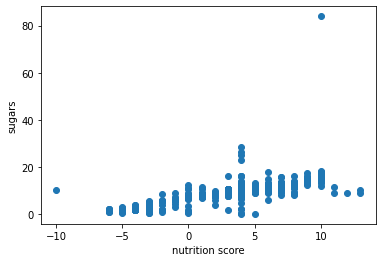

In [ ]:
plt.scatter(juices_clean_median['nutrition-score-fr_100g'],juices_clean_median["sugars_100g"])
plt.xlabel('nutrition score')
plt.ylabel("sugars")
plt.show()

In [ ]:
test_correlation(juices_clean_median["nutrition-score-fr_100g"],juices_clean_median["energy_100g"])

Pearson linear correlation statistical test between nutrition-score-fr_100g and energy_100g

Linear correlation coefficient= 0.5557283054765115, p-valeur= 2.255926494189616e-156

p-value < 5%, H1: Variables are not independent.


In [ ]:
test_correlation(juices_clean_median["nutrition-score-fr_100g"],juices_clean_median["additives_n"])

Pearson linear correlation statistical test between nutrition-score-fr_100g and additives_n

Linear correlation coefficient= -0.02604286320894323, p-valeur= 0.25354530047287493

p-value > 5%, H0: Variables are independent.


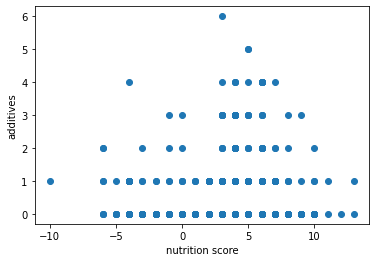

In [ ]:
plt.scatter(juices_clean_median['nutrition-score-fr_100g'],juices_clean_median["additives_n"])
plt.xlabel('nutrition score')
plt.ylabel("additives")
plt.show()

### PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Data Preparation

In [ ]:
juices_clean_median_pca = juices_clean_median.drop(columns=['categories','labels','brands','quantity','origins','manufacturing_places','nutrition_grade_fr'])
juices_clean_median_pca.set_index(["product_name"],inplace=True)
X = juices_clean_median_pca.values
X

array([[-2.00e+00,  0.00e+00,  1.05e+02, ...,  0.00e+00,  5.56e+00,
         0.00e+00],
       [ 4.00e+00,  3.00e+00,  3.03e+02, ...,  8.77e-01,  1.18e+01,
         5.48e+00],
       [ 0.00e+00,  0.00e+00,  1.42e+02, ...,  3.00e-01,  6.29e+00,
         0.00e+00],
       ...,
       [ 4.00e+00,  1.00e+00,  2.34e+02, ...,  3.00e-01,  1.00e+01,
         1.40e-01],
       [ 4.00e+00,  0.00e+00,  1.96e+02, ...,  3.00e-01,  1.00e+01,
         5.00e-01],
       [ 4.00e+00,  0.00e+00,  1.92e+02, ...,  6.00e-01,  9.20e+00,
         6.00e-01]])

In [ ]:
names = juices_clean_median_pca.index
names

Index([                              'Strawberry Lemonade',
                'mango protein flavored soy protein shake',
                                           'Coconut Juice',
                                           'coconut juice',
                                   'Roasted Coconut Juice',
                                  'White Grapefruit Juice',
                                     'Safeway apple juice',
                                       '100% Orange Juice',
                                       'Juicy Juice Apple',
                                             'apple juice',
       ...
                 'Juice of Apple, Mandarin & Passionfruit',
                'Nothing But 21 Oranges - Juice with Pulp',
                  'Nothing but 21 oranges pulp free juice',
                           'Spring Valley pineapple juice',
                                            'Orange Juice',
                'Nothing But 31.5 Oranges Pulp Free Juice',
                           'D

In [ ]:
features = juices_clean_median_pca.columns
features

Index(['nutrition-score-fr_100g', 'additives_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'sodium_100g', 'carbohydrates_100g', 'fiber_100g',
       'sugars_100g', 'proteins_100g'],
      dtype='object')

####Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-2.45867708, -0.36162633, -1.54840237, ..., -1.05247777,
        -1.52210077, -0.9601605 ],
       [-0.02216165,  4.29754146,  1.68904708, ...,  1.70097357,
         0.55225919, 10.14380798],
       [-1.64650527, -0.36162633, -0.94342445, ..., -0.1105902 ,
        -1.27942725, -0.9601605 ],
       ...,
       [-0.02216165,  1.1914296 ,  0.560845  , ..., -0.1105902 ,
        -0.04611388, -0.67648247],
       [-0.02216165, -0.36162633, -0.06048369, ..., -0.1105902 ,
        -0.04611388,  0.05297531],
       [-0.02216165, -0.36162633, -0.1258867 , ...,  0.83129737,
        -0.31205746,  0.25560247]])

In [ ]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9
mean,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### PCA

In [ ]:
n = len(features) #the same numer as variable

In [ ]:
pca = PCA(n_components=n)
pca = PCA()
pca.fit(X_scaled)

PCA()

#### Explained Variance & Scree Plot

In [ ]:
pca.explained_variance_ratio_

array([0.31411976, 0.14537889, 0.10762894, 0.1022786 , 0.09780337,
       0.0885443 , 0.06335629, 0.04754977, 0.02335447, 0.0099856 ])

In [ ]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([31.41, 14.54, 10.76, 10.23,  9.78,  8.85,  6.34,  4.75,  2.34,
        1.  ])

In [ ]:
scree_cum = scree.cumsum().round(1)
scree_cum #92%

array([ 31.4,  46. ,  56.7,  66.9,  76.7,  85.6,  91.9,  96.7,  99. ,
       100. ])

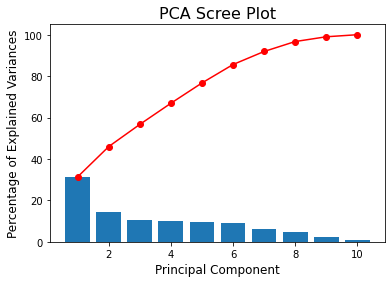

In [ ]:
x_list = range(1, n+1)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Percentage of Explained Variances",fontsize=12)
plt.title("PCA Scree Plot",fontsize=16)
plt.show()

#### Components

In [ ]:
pcs = pca.components_
pcs

array([[ 4.45933353e-01,  2.32213080e-03,  4.96126651e-01,
         3.25724666e-02,  4.78343368e-04, -1.09132210e-02,
         5.16193079e-01,  4.77066676e-02,  5.33690567e-01,
        -1.61016657e-02],
       [-7.10303423e-02, -1.68606261e-01,  1.09308456e-01,
         6.55436964e-01,  3.21548422e-01, -5.24614234e-02,
         5.78956238e-03,  1.64575421e-01, -8.44957645e-02,
         6.20142690e-01],
       [-1.67942798e-01,  5.77055384e-01,  5.78360466e-02,
        -3.78401847e-02, -2.47416572e-01, -1.63575362e-01,
         7.73603557e-03,  7.33427720e-01,  1.28774607e-02,
         8.89475000e-02],
       [ 7.54006430e-02,  4.55642715e-01, -3.62173399e-02,
         9.76589694e-02,  2.89341195e-01,  8.29891798e-01,
        -6.84363877e-03, -4.63456301e-02, -1.08070198e-02,
        -3.32448693e-02],
       [ 1.15770179e-02,  2.97853514e-01,  1.93100293e-02,
        -1.98422106e-02,  7.71609482e-01, -4.46251673e-01,
         1.17990907e-03, -3.19617618e-02, -4.59398668e-02,
        -3.

In [ ]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9
0,0.445933,0.002322,0.496127,0.032572,0.000478,-0.010913,0.516193,0.047707,0.533691,-0.016102
1,-0.071030,-0.168606,0.109308,0.655437,0.321548,-0.052461,0.005790,0.164575,-0.084496,0.620143
2,-0.167943,0.577055,0.057836,-0.037840,-0.247417,-0.163575,0.007736,0.733428,0.012877,0.088947
3,0.075401,0.455643,-0.036217,0.097659,0.289341,0.829892,-0.006844,-0.046346,-0.010807,-0.033245
4,0.011577,0.297854,0.019310,-0.019842,0.771609,-0.446252,0.001180,-0.031962,-0.045940,-0.335749
5,-0.002968,-0.581925,-0.028786,-0.186239,0.287183,0.265357,0.013142,0.637357,-0.029110,-0.256335
6,-0.109382,0.015388,0.111154,-0.719276,0.255848,0.023413,0.046835,-0.067467,0.011604,0.620645
7,-0.810514,-0.046488,0.336563,0.055915,-0.007138,0.097965,0.403546,-0.134975,-0.020598,-0.182661
8,0.135471,-0.007023,0.777261,-0.037207,-0.062439,0.038040,-0.450522,-0.016068,-0.398269,-0.094273
9,-0.273524,-0.034092,0.079296,0.037754,0.066406,0.022455,-0.604332,-0.017344,0.738659,-0.016122


In [ ]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,nutrition-score-fr_100g,additives_n,energy_100g,fat_100g,saturated-fat_100g,sodium_100g,carbohydrates_100g,fiber_100g,sugars_100g,proteins_100g
F1,0.45,0.00,0.50,0.03,0.00,-0.01,0.52,0.05,0.53,-0.02
F2,-0.07,-0.17,0.11,0.66,0.32,-0.05,0.01,0.16,-0.08,0.62
F3,-0.17,0.58,0.06,-0.04,-0.25,-0.16,0.01,0.73,0.01,0.09
F4,0.08,0.46,-0.04,0.10,0.29,0.83,-0.01,-0.05,-0.01,-0.03
F5,0.01,0.30,0.02,-0.02,0.77,-0.45,0.00,-0.03,-0.05,-0.34
F6,-0.00,-0.58,-0.03,-0.19,0.29,0.27,0.01,0.64,-0.03,-0.26
F7,-0.11,0.02,0.11,-0.72,0.26,0.02,0.05,-0.07,0.01,0.62
F8,-0.81,-0.05,0.34,0.06,-0.01,0.10,0.40,-0.13,-0.02,-0.18
F9,0.14,-0.01,0.78,-0.04,-0.06,0.04,-0.45,-0.02,-0.40,-0.09
F10,-0.27,-0.03,0.08,0.04,0.07,0.02,-0.60,-0.02,0.74,-0.02


In [ ]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
nutrition-score-fr_100g,0.445933,-0.071030,-0.167943,0.075401,0.011577,-0.002968,-0.109382,-0.810514,0.135471,-0.273524
additives_n,0.002322,-0.168606,0.577055,0.455643,0.297854,-0.581925,0.015388,-0.046488,-0.007023,-0.034092
energy_100g,0.496127,0.109308,0.057836,-0.036217,0.019310,-0.028786,0.111154,0.336563,0.777261,0.079296
fat_100g,0.032572,0.655437,-0.037840,0.097659,-0.019842,-0.186239,-0.719276,0.055915,-0.037207,0.037754
saturated-fat_100g,0.000478,0.321548,-0.247417,0.289341,0.771609,0.287183,0.255848,-0.007138,-0.062439,0.066406
sodium_100g,-0.010913,-0.052461,-0.163575,0.829892,-0.446252,0.265357,0.023413,0.097965,0.038040,0.022455
carbohydrates_100g,0.516193,0.005790,0.007736,-0.006844,0.001180,0.013142,0.046835,0.403546,-0.450522,-0.604332
fiber_100g,0.047707,0.164575,0.733428,-0.046346,-0.031962,0.637357,-0.067467,-0.134975,-0.016068,-0.017344
sugars_100g,0.533691,-0.084496,0.012877,-0.010807,-0.045940,-0.029110,0.011604,-0.020598,-0.398269,0.738659
proteins_100g,-0.016102,0.620143,0.088947,-0.033245,-0.335749,-0.256335,0.620645,-0.182661,-0.094273,-0.016122


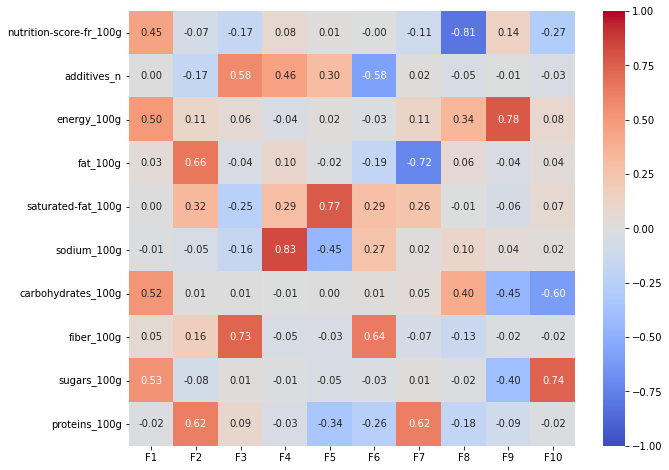

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

#### Correlation Graph

In [ ]:
x, y = 0,1

In [ ]:
from matplotlib.cm import get_cmap
name = "tab20"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

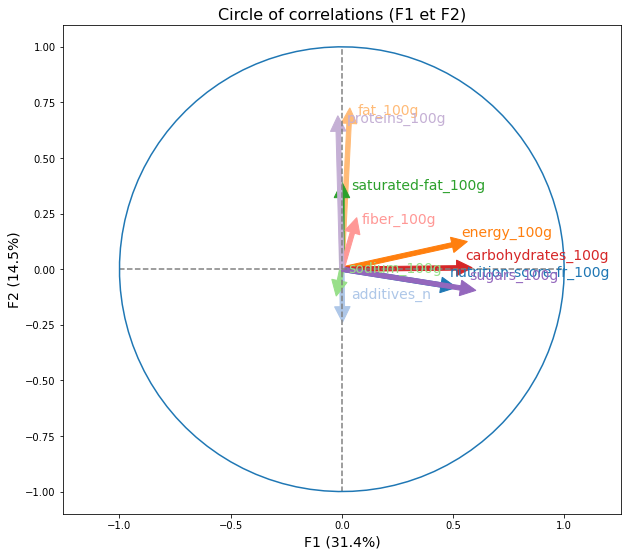

In [ ]:
fig, ax = plt.subplots(figsize=(10, 9))

for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07,
             width=0.02,
             color=colors[i])

    plt.text(pca.components_[0, i] + 0.04, pca.components_[1, i] + 0.04, features[i], fontsize=14, color=colors[i])

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)), fontsize=14)
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)), fontsize=14)

plt.title("Circle of correlations (F{} et F{})".format(x+1, y+1), fontsize=16)

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')

plt.show()

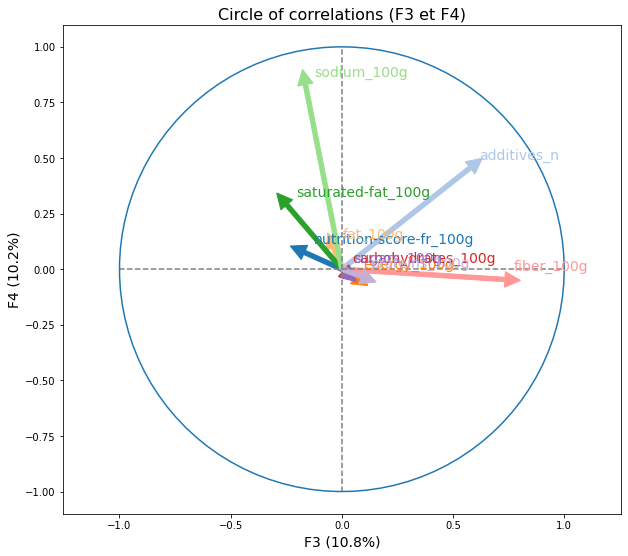

In [ ]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[2, i],  #0 for PC3
             pca.components_[3, i],  #1 for PC4
             head_width=0.07,
             head_length=0.07,
             width=0.02,
             color=colors[i])

    plt.text(pca.components_[2, i] + 0.04, pca.components_[3, i] + 0.04, features[i], fontsize=14, color=colors[i])

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlabel('F{} ({}%)'.format(x+3, round(100*pca.explained_variance_ratio_[x+2],1)), fontsize=14)
plt.ylabel('F{} ({}%)'.format(y+3, round(100*pca.explained_variance_ratio_[y+2],1)), fontsize=14)

plt.title("Circle of correlations (F{} et F{})".format(x+3, y+3), fontsize=16)

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')

plt.show()